# &#x1F4D1; &nbsp; Scikit-Learn Cookbook
## 0. Code Library and Links
  
* [DOMINO. Fitting Gaussian Process Models in Python](https://blog.dominodatalab.com/fitting-gaussian-process-models-python/)

In [18]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto');
body {background-color: gainsboro;} 
a {color: darkgreen; font-family: 'Roboto';} 
h1 {color: slategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: darkslategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: slategray; font-family: 'Roboto';}        
</style>

In [19]:
import numpy as np 
import pandas as pd 
import scipy
import seaborn
import matplotlib.pylab as plt
from matplotlib import cm

%matplotlib inline

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
from sklearn import datasets, preprocessing
from sklearn import linear_model, svm

In [22]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [26]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.cross_decomposition import PLSRegression

from sklearn.gaussian_process import GaussianProcessRegressor, GaussianProcessClassifier
from sklearn.gaussian_process.kernels import WhiteKernel, RationalQuadratic, RBF

In [27]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

In [28]:
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid

In [29]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [30]:
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.isotonic import IsotonicRegression

In [31]:
from sklearn import cluster, mixture, manifold, dummy

In [32]:
from sklearn.neural_network import MLPClassifier, BernoulliRBM, MLPRegressor

In [33]:
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import accuracy_score, hamming_loss, classification_report

In [34]:
regressor_list = []
regressor_names = []
reg_datasets = []

r2_train, r2_test = [], []
ev_train, ev_test = [], []

mse_train, mse_test = [], []
mae_train, mae_test = [], []

mdae_train, mdae_test = [], []

In [35]:
def regressor_fit_score(regressor, regressor_name, dataset, x_train, x_test, y_train, y_test):
    regressor_list.append(str(regressor))
    regressor_names.append(str(regressor_name))
    reg_datasets.append(str(dataset))
    
    reg = regressor
    reg.fit(x_train, y_train)
    
    y_reg_train = reg.predict(x_train)
    y_reg_test = reg.predict(x_test)
    
    r2_reg_train = round(r2_score(y_train, y_reg_train), 4)
    r2_train.append(r2_reg_train)
    r2_reg_test = round(r2_score(y_test, y_reg_test), 4)
    r2_test.append(r2_reg_test)
    
    ev_reg_train = round(explained_variance_score(y_train, y_reg_train), 4)
    ev_train.append(ev_reg_train)
    ev_reg_test = round(explained_variance_score(y_test, y_reg_test), 4)
    ev_test.append(ev_reg_test)
    
    mse_reg_train = round(mean_squared_error(y_train, y_reg_train), 4)
    mse_train.append(mse_reg_train)
    mse_reg_test = round(mean_squared_error(y_test, y_reg_test), 4)
    mse_test.append(mse_reg_test)
    
    mae_reg_train = round(mean_absolute_error(y_train, y_reg_train), 4)
    mae_train.append(mae_reg_train)
    mae_reg_test = round(mean_absolute_error(y_test, y_reg_test), 4)
    mae_test.append(mae_reg_test)
    
    mdae_reg_train = round(median_absolute_error(y_train, y_reg_train), 4)
    mdae_train.append(mdae_reg_train)
    mdae_reg_test = round(median_absolute_error(y_test, y_reg_test), 4)
    mdae_test.append(mdae_reg_test)
    
    return [y_reg_train, y_reg_test, mdae_reg_train, mdae_reg_test,
            r2_reg_train, r2_reg_test, ev_reg_train, ev_reg_test,
            mse_reg_train, mse_reg_test, mae_reg_train, mae_reg_test]

In [36]:
def get_regressor_results():
    df_results = pd.DataFrame({'regressor' : regressor_list,
                               'regressor_name': regressor_names,
                               'dataset': reg_datasets,
                               'r2_train': r2_train, 'r2_test': r2_test,
                               'ev_train': ev_train, 'ev_test': ev_test,
                               'mse_train': mse_train, 'mse_test': mse_test,
                               'mae_train': mae_train, 'mae_test': mae_test,
                               'mdae_train': mdae_train, 'mdae_test': mdae_test})
    
    df_list = ['regressor_name', 'r2_train', 'r2_test', 'ev_train', 'ev_test',
               'mse_train', 'mse_test', 'mae_train', 'mae_test', 'mdae_train', 'mdae_test']
               
    return df_results, df_results[df_list]

In [37]:
classifier_list = []
classifier_names = []
clf_datasets = []

acc_train, acc_test = [], []
loss_train, loss_test = [], []

In [38]:
def classifier_fit_score(classifier, classifier_name, clf_dataset, x_train, x_test, y_train, y_test):
    classifier_list.append(str(classifier))
    classifier_names.append(str(classifier_name))
    clf_datasets.append(str(clf_dataset))
    
    clf = classifier
    clf.fit(x_train, y_train)
    
    y_clf_train = clf.predict(x_train)
    y_clf_test = clf.predict(x_test)
        
    acc_clf_train = round(accuracy_score(y_train, y_clf_train), 4)
    acc_train.append(acc_clf_train)
    acc_clf_test = round(accuracy_score(y_test, y_clf_test), 4)
    acc_test.append(acc_clf_test)
    
    loss_clf_train = round(hamming_loss(y_train, y_clf_train), 4)
    loss_train.append(loss_clf_train)
    loss_clf_test = round(hamming_loss(y_test, y_clf_test), 4)
    loss_test.append(loss_clf_test)
    
    return [y_clf_train, y_clf_test, acc_clf_train, acc_clf_test, loss_clf_train, loss_clf_test]

In [39]:
def get_classifier_results():
    df_results = pd.DataFrame({'classifier' : classifier_list,
                               'classifier_name': classifier_names,
                               'clf_dataset': clf_datasets,
                               'acc_train': acc_train, 'acc_test': acc_test,
                               'loss_train': loss_train, 'loss_test': loss_test})
    
    df_list = ['classifier_name', 'acc_train', 'acc_test', 'loss_train', 'loss_test']
               
    return df_results, df_results[df_list]

In [40]:
%precision %.4g
0.1234567

0.1235

---
## 1. Data Samples

In [41]:
# external
boston = datasets.load_boston()
housing = datasets.fetch_california_housing()
digits = datasets.load_digits()

In [132]:
X1, y1 = boston.data, boston.target
X2, y2 = housing.data, housing.target
X3, y3 = digits.data, digits.target

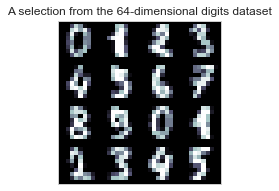

In [133]:
# Digit Data
n_img_per_row = 4
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X3[i * n_img_per_row + j].reshape((8, 8))

plt.figure(figsize=(3, 3))
plt.imshow(img, cmap=plt.cm.bone)

plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset');

In [47]:
# artificial
# 5000x3 - matrix, 2 - (responsible for targets) features, 1 - the target, 0.97 - the bias factor)
regression_data = datasets.make_regression(5000, 3, 2, 1, 0.97)
X4, y4 = regression_data[0], regression_data[1]

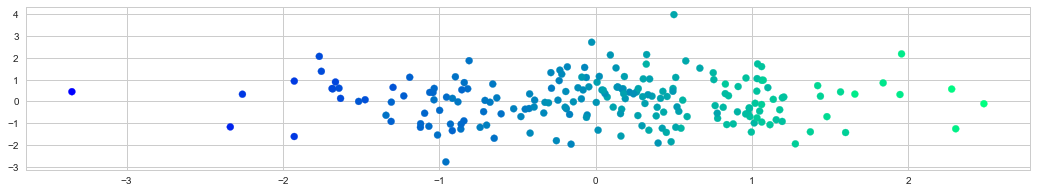

In [50]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18,3))
plt.scatter(X4[:200, 0], X4[:200, 1], c=y4[:200], cmap=cm.winter);

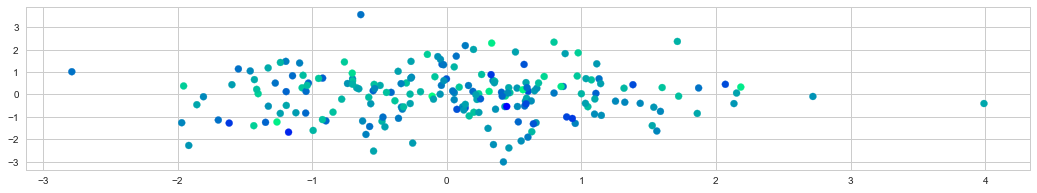

In [51]:
plt.figure(figsize=(18,3))
plt.scatter(X4[:200, 1], X4[:200, 2], c=y4[:200], cmap=cm.winter);

In [52]:
# 5000x10 - matrix, 8 - (responsible for targets) features, 2 - targets, 0.7 - the bias factor, 10.0 - the noise)
regression_data2 = datasets.make_regression(5000, 10, 8, 2, 0.7, noise=10.0)
X7, y7 = regression_data2[0], regression_data2[1]

In [53]:
blobs_data = datasets.make_blobs(n_samples=1000, centers=[[1, 1], [-1, -1], [1, -1], [-1, 1]], cluster_std=0.5)
X5, y5 = blobs_data[0], blobs_data[1]

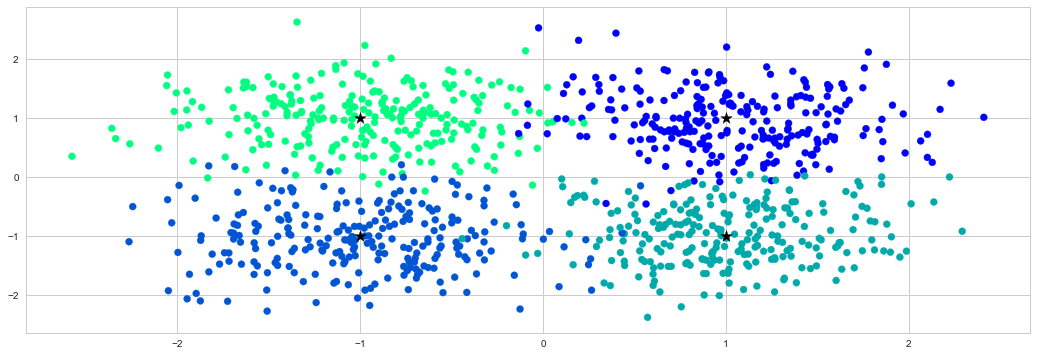

In [54]:
plt.figure(figsize=(18,6))
plt.scatter(X5[:, 0], X5[:, 1], c=y5, cmap=cm.winter)
plt.scatter([1,-1,1,-1], [1,-1,-1,1], c='black', marker='*', s=150);

In [55]:
classification_data = datasets.make_multilabel_classification(n_classes=3, n_samples=1000, n_features=2)
X6, y6 = classification_data[0], classification_data[1]

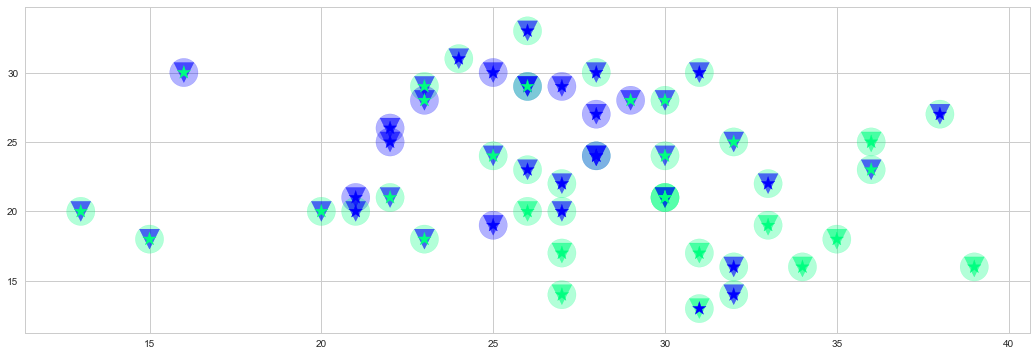

In [162]:
plt.figure(figsize=(18,6))
plt.scatter(X6[:50, 0], X6[:50, 1], c=y6[:50, 0], marker='o', alpha=0.3, cmap=cm.winter, s=800)
plt.scatter(X6[:50, 0], X6[:50, 1], c=y6[:50, 1], marker='v', alpha=0.6, cmap=cm.winter, s=400)
plt.scatter(X6[:50, 0], X6[:50, 1], c=y6[:50, 2], marker='*', cmap=cm.winter, s=200);

---
## 2. Extraction and Preprocessing

### *Extraction*

In [14]:
temperature = [{'city': 'Hanoi', 'temperature': 33.}, {'city': 'Frankfurt', 'temperature': 16.},
               {'city': 'Houston', 'temperature': 28.}, {'city': 'Riyadh', 'temperature': 38.},
               {'city': 'Barcelona', 'temperature': 17.}, {'city': 'Ankara', 'temperature': 27.}]

corpus = ['Have you already set your goals for the New Year?', 
          'Do you want to lose ten kilos, run a marathon or speak fluent English?', 
          'Some experts believe that you need systems, not goals.', 
          'A system is something you do on a regular basis. ',
          'This means focusing on what you can control (your actions) rather than what you can’t.',
          'For example, do not focus on losing ten kilos.',
          'Focus on shopping for healthy food and cooking something light every day.',
          'Do not focus on the marathon.',
          'Focus on the training schedule.',
          'Invent a system to improve your English, one step at a time.',
          'Good luck!']

In [18]:
# Extraction from dicts
d_vectorizer = DictVectorizer()
d_vectorizer.fit_transform(temperature).toarray()

array([[  0.,   0.,   0.,   1.,   0.,   0.,  33.],
       [  0.,   0.,   1.,   0.,   0.,   0.,  16.],
       [  0.,   0.,   0.,   0.,   1.,   0.,  28.],
       [  0.,   0.,   0.,   0.,   0.,   1.,  38.],
       [  0.,   1.,   0.,   0.,   0.,   0.,  17.],
       [  1.,   0.,   0.,   0.,   0.,   0.,  27.]])

In [21]:
print(d_vectorizer.get_feature_names())

['city=Ankara', 'city=Barcelona', 'city=Frankfurt', 'city=Hanoi', 'city=Houston', 'city=Riyadh', 'temperature']


In [16]:
# Extraction from texts
c_vectorizer = CountVectorizer(min_df=1)
X_corpus = c_vectorizer.fit_transform(corpus)
X_corpus

<11x65 sparse matrix of type '<class 'numpy.int64'>'
	with 96 stored elements in Compressed Sparse Row format>

In [23]:
print(c_vectorizer.get_feature_names())

['actions', 'already', 'and', 'at', 'basis', 'believe', 'can', 'control', 'cooking', 'day', 'do', 'english', 'every', 'example', 'experts', 'fluent', 'focus', 'focusing', 'food', 'for', 'goals', 'good', 'have', 'healthy', 'improve', 'invent', 'is', 'kilos', 'light', 'lose', 'losing', 'luck', 'marathon', 'means', 'need', 'new', 'not', 'on', 'one', 'or', 'rather', 'regular', 'run', 'schedule', 'set', 'shopping', 'some', 'something', 'speak', 'step', 'system', 'systems', 'ten', 'than', 'that', 'the', 'this', 'time', 'to', 'training', 'want', 'what', 'year', 'you', 'your']


In [28]:
c_analyzer = c_vectorizer.build_analyzer()
c_analyzer(corpus[7])

['do', 'not', 'focus', 'on', 'the', 'marathon']

In [27]:
X_corpus.toarray()[7] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### *Scaling*

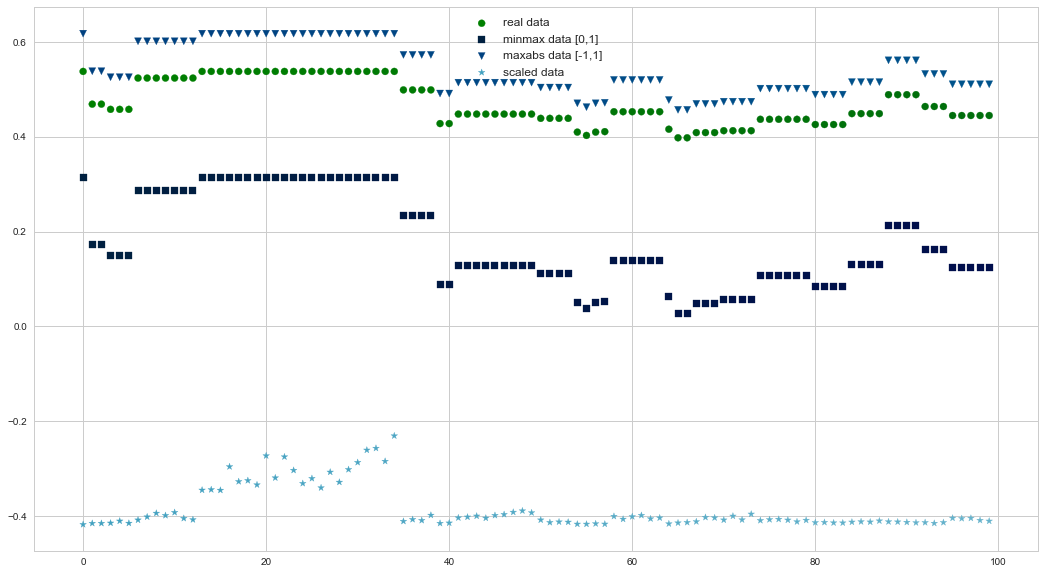

In [123]:
# Scaling features to a range
X1_scaled = preprocessing.scale(X1)
X1_minmax = preprocessing.MinMaxScaler().fit_transform(X1)
X1_maxabs = preprocessing.MaxAbsScaler().fit_transform(X1)

n = len(X1)
colors = cm.ocean(np.linspace(0, 1, 4*n))

plt.figure(figsize=(18, 10))
plt.scatter(range(100), X1[:100, 4], c=colors[:n], marker='o', label='real data')
plt.scatter(range(100), X1_minmax[:100, 4], c=colors[n:2*n], marker='s', label='minmax data [0,1]')
plt.scatter(range(100), X1_maxabs[:100, 4], color=colors[2*n:3*n], marker='v', label='maxabs data [-1,1]')
plt.scatter(range(100), X1_scaled[:100, 0], color=colors[3*n:4*n], marker='*', label='scaled data')

plt.legend(fontsize=12, loc=9);

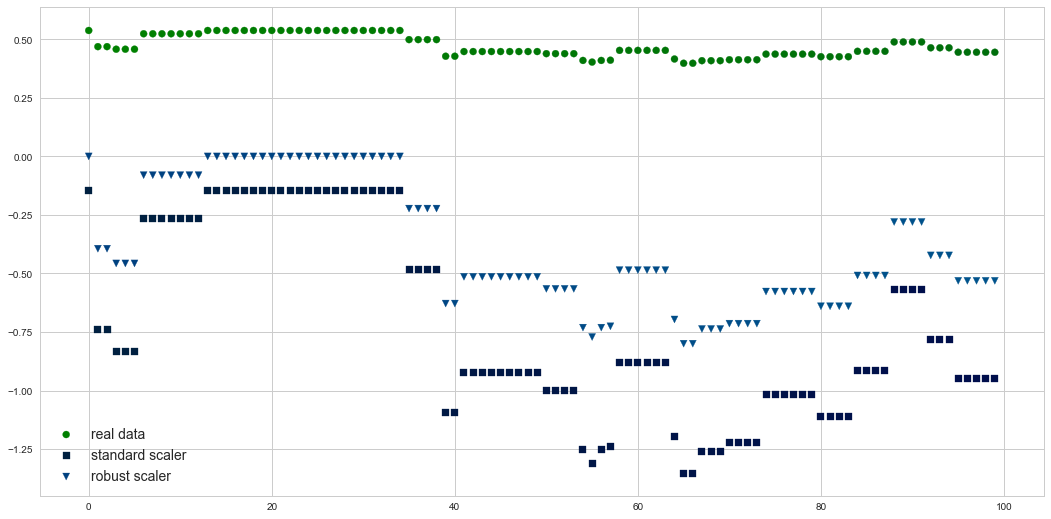

In [124]:
# StandardScaler, RobustScaler (data with outliers)
X1_stscaled = preprocessing.StandardScaler().fit_transform(X1)
X1_rbscaled = preprocessing.RobustScaler().fit_transform(X1)

plt.figure(figsize=(18,9))
plt.scatter(range(100), X1[:100, 4], color=colors[:n], marker='o', label='real data')
plt.scatter(range(100), X1_stscaled[:100, 4], color=colors[n:2*n], marker='s', label='standard scaler')
plt.scatter(range(100), X1_rbscaled[:100, 4], color=colors[2*n:3*n], marker='v', label='robust scaler')

plt.legend(fontsize=14);

### *Encoding, Imputation of Missing Values, Transforming*

In [125]:
# Encoding categorical features
print(y3[:3])
encoder = preprocessing.OneHotEncoder()
encoder.fit(y3.reshape(y3.shape[0], 1))
y3_cat = encoder.transform(y3.reshape(y3.shape[0], 1)).toarray()
print(y3_cat[:3])

[0 1 2]
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]


In [126]:
# Imputation of missing values
x1_train = [[0, 17], [np.nan, 4], [1, 7], [3, np.nan], [10, 25]]
x1_test = [[np.nan, 5], [8, np.nan], [4, 6]]

# mean
mean_imputer = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
mean_imputer.fit(x1_train)
mean_imputer.transform(x1_test)

array([[  3.5 ,   5.  ],
       [  8.  ,  13.25],
       [  4.  ,   6.  ]])

In [127]:
# median
median_imputer = preprocessing.Imputer(missing_values='NaN', strategy='median', axis=0)
median_imputer.fit(x1_train)
median_imputer.transform(x1_test)

array([[  2.,   5.],
       [  8.,  12.],
       [  4.,   6.]])

In [128]:
# Custom transformers
log_transformer = preprocessing.FunctionTransformer(np.log1p)
x1_log = log_transformer.transform(median_imputer.transform(x1_test))
x1_log

array([[ 1.09861229,  1.79175947],
       [ 2.19722458,  2.56494936],
       [ 1.60943791,  1.94591015]])

### *Dimensionality Reduction*

In [ ]:
# Principal component analysis


In [ ]:
# Random projections


In [ ]:
# Feature agglomeration


### *Shuffling and Splitting*

In [136]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 1)
X_train1.shape, X_test1.shape

((404, 13), (102, 13))

In [137]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 1)
X_train2.shape, X_test2.shape

((16512, 8), (4128, 8))

In [138]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 1)
X_train3.shape, X_test3.shape

((1437, 64), (360, 64))

In [139]:
y_train3.shape, y_test3.shape

((1437,), (360,))

In [140]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.2, random_state = 1)
X_train4.shape, X_test4.shape

((4000, 3), (1000, 3))

In [141]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size = 0.2, random_state = 1)
X_train5.shape, X_test5.shape

((800, 2), (200, 2))

In [142]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size = 0.2, random_state = 1)
X_train6.shape, X_test6.shape

((800, 2), (200, 2))

In [143]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size = 0.2, random_state = 1)
X_train7.shape, X_test7.shape

((4000, 10), (1000, 10))

---
## 3. Supervised learning
### 3.1 Regression

### *Generalized Linear Models; Boston Dataset*

In [42]:
reg1 = linear_model.LinearRegression()
reg2 = linear_model.Ridge()
reg3 = linear_model.RidgeCV()
reg4 = linear_model.Lasso()
reg5 = linear_model.LassoLarsCV()

In [43]:
y_lr_train11, y_lr_test11 = regressor_fit_score(reg1, 'LinearRegression', 'boston',
                                                X_train1, X_test1, y_train1, y_test1)[:2]

y_rr_train12, y_rr_test12 = regressor_fit_score(reg2, 'Ridge', 'boston',
                                                X_train1, X_test1, y_train1, y_test1)[:2]

y_rcvr_train13, y_rcvr_test13 = regressor_fit_score(reg3, 'RidgeCV', 'boston',
                                                    X_train1, X_test1, y_train1, y_test1)[:2]

y_lsr_train14, y_lsr_test14 = regressor_fit_score(reg4, 'Lasso', 'boston',
                                                  X_train1, X_test1, y_train1, y_test1)[:2]

y_llcvr_train15, y_llcvr_test15 = regressor_fit_score(reg5, 'LassoLarsCV', 'boston',
                                                      X_train1, X_test1, y_train1, y_test1)[:2]

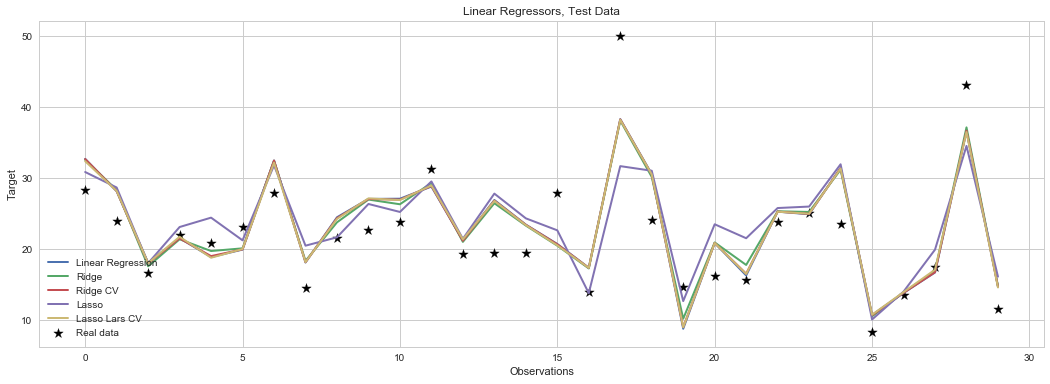

In [44]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test1[:n], marker='*', s=100, color='black', label='Real data')

plt.plot(x, y_lr_test11[:n], lw=2, label='Linear Regression')
plt.plot(x, y_rr_test12[:n], lw=2, label='Ridge')
plt.plot(x, y_rcvr_test13[:n], lw=2, label='Ridge CV')
plt.plot(x, y_lsr_test14[:n], lw=2, label='Lasso')
plt.plot(x, y_llcvr_test15[:n], lw=2, label='Lasso Lars CV')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Linear Regressors, Test Data')
plt.legend(loc=3);

In [45]:
reg6 = linear_model.RANSACRegressor()
reg7 = linear_model.BayesianRidge()
reg8 = linear_model.ARDRegression()
reg9 = linear_model.HuberRegressor()
reg10 = linear_model.TheilSenRegressor()

In [46]:
y_ranr_train16, y_ranr_test16 = regressor_fit_score(reg6, 'RANSACRegressor', 'boston',
                                                  X_train1, X_test1, y_train1, y_test1)[:2]

y_br_train17, y_br_test17 = regressor_fit_score(reg7, 'BayesianRidge', 'boston',
                                                X_train1, X_test1, y_train1, y_test1)[:2]

y_ardr_train18, y_ardr_test18 = regressor_fit_score(reg8, 'ARDRegression', 'boston',
                                                    X_train1, X_test1, y_train1, y_test1)[:2]

y_hr_train19, y_hr_test19 = regressor_fit_score(reg9, 'HuberRegressor', 'boston',
                                                X_train1, X_test1, y_train1, y_test1)[:2]

y_tsr_train110, y_tsr_test110 = regressor_fit_score(reg10, 'TheilSenRegressor', 'boston',
                                                    X_train1, X_test1, y_train1, y_test1)[:2]

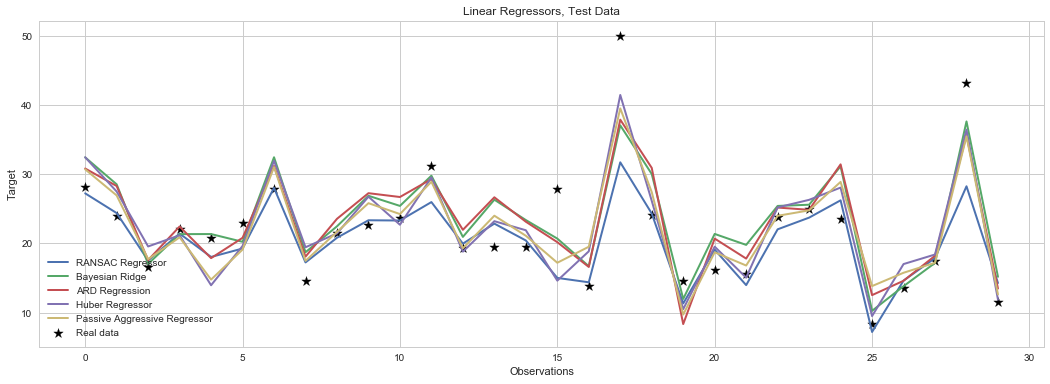

In [47]:
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test1[:n], marker='*', s=100, color='black', label='Real data')

plt.plot(x, y_ranr_test16[:n], lw=2, label='RANSAC Regressor')
plt.plot(x, y_br_test17[:n], lw=2, label='Bayesian Ridge')
plt.plot(x, y_ardr_test18[:n], lw=2, label='ARD Regression')
plt.plot(x, y_hr_test19[:n], lw=2, label='Huber Regressor')
plt.plot(x, y_tsr_test110[:n], lw=2, label='Passive Aggressive Regressor')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Linear Regressors, Test Data')
plt.legend(loc=3);

### *Generalized Linear Models; Toy Regression Dataset*

In [48]:
reg11 = linear_model.PassiveAggressiveRegressor()
reg12 = linear_model.ElasticNet()
reg13 = linear_model.SGDRegressor()

In [49]:
y_par_train411, y_par_test411 = regressor_fit_score(reg11, 'PassiveAggressiveRegressor', 'toy regression',
                                                   X_train4, X_test4, y_train4, y_test4)[:2]

y_enr_train412, y_enr_test412 = regressor_fit_score(reg12, 'ElasticNet', 'toy regression',
                                                X_train4, X_test4, y_train4, y_test4)[:2]

y_sgdr_train413, y_sgdr_test413 = regressor_fit_score(reg13, 'SGDRegressor', 'toy regression',
                                                      X_train4, X_test4, y_train4, y_test4)[:2]


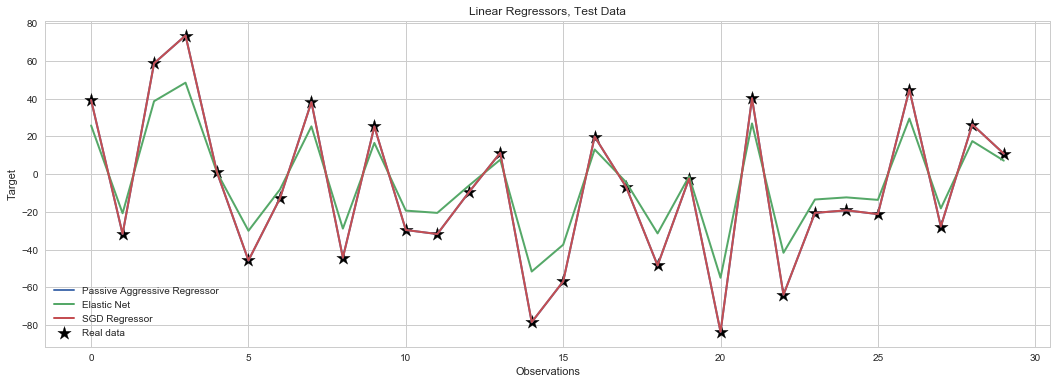

In [50]:
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test4[:n], marker='*', s=200, color='black', label='Real data')

plt.plot(x, y_par_test411[:n], lw=2, label='Passive Aggressive Regressor')
plt.plot(x, y_enr_test412[:n], lw=2, label='Elastic Net')
plt.plot(x, y_sgdr_test413[:n], lw=2, label='SGD Regressor')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Linear Regressors, Test Data')
plt.legend(loc=3);

### *Support Vector Machines, Nearest Neighbors; Toy Regression Dataset*

In [51]:
reg15 = svm.SVR()
reg16 = KNeighborsRegressor()
reg17 = RadiusNeighborsRegressor(radius=1.5)

In [52]:
y_svr_train415, y_svr_test415 = regressor_fit_score(reg15, 'SVR', 'toy regression',
                                                    X_train4, X_test4, y_train4, y_test4)[:2]

y_knr_train416, y_knr_test416 = regressor_fit_score(reg16, 'KNeighborsRegressor', 'toy regression',
                                                    X_train4, X_test4, y_train4, y_test4)[:2]

y_rnr_train417, y_rnr_test417 = regressor_fit_score(reg17, 'RadiusNeighborsRegressor', 'toy regression',
                                                    X_train4, X_test4, y_train4, y_test4)[:2]

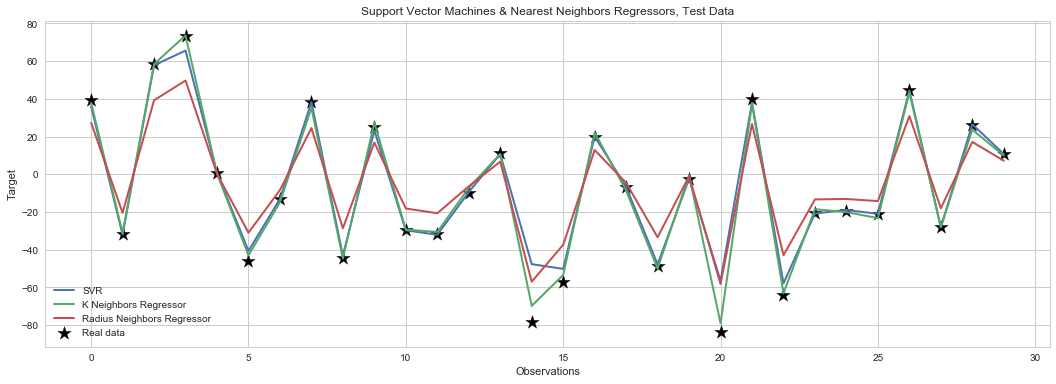

In [53]:
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test4[:n], marker='*', s=200, color='black', label='Real data')

plt.plot(x, y_svr_test415[:n], lw=2, label='SVR')
plt.plot(x, y_knr_test416[:n], lw=2, label='K Neighbors Regressor')
plt.plot(x, y_rnr_test417[:n], lw=2, label='Radius Neighbors Regressor')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Support Vector Machines & Nearest Neighbors Regressors, Test Data')
plt.legend(loc=3);

### *Partial Least Squares (PLS) & Tree Regressors; Boston Dataset*

In [54]:
reg19 = PLSRegression()
reg20 = DecisionTreeRegressor()
reg21 = ExtraTreeRegressor()

In [55]:
y_plsr_train119, y_plsr_test119 = regressor_fit_score(reg19, 'PLSRegression', 'boston',
                                                      X_train1, X_test1, y_train1, y_test1)[:2]

y_dtr_train120, y_dtr_test120 = regressor_fit_score(reg20, 'DecisionTreeRegressor', 'boston',
                                                    X_train1, X_test1, y_train1, y_test1)[:2]

y_etr_train121, y_etr_test121 = regressor_fit_score(reg21, 'ExtraTreeRegressor', 'boston',
                                                    X_train1, X_test1, y_train1, y_test1)[:2]

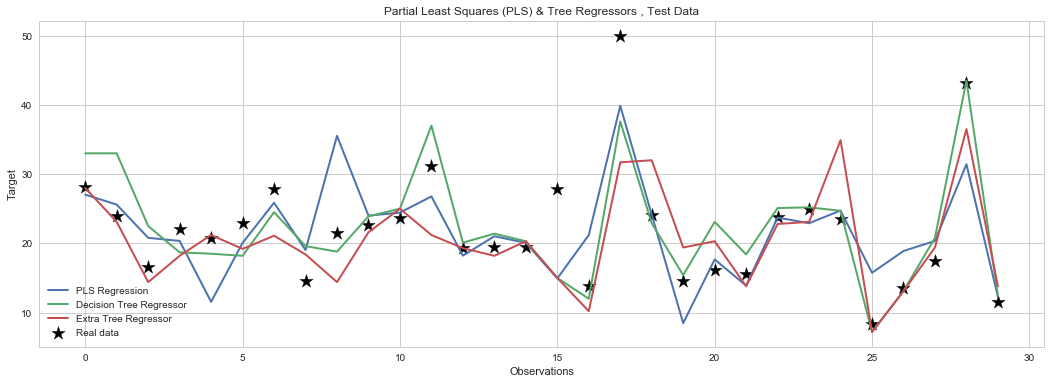

In [56]:
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test1[:n], marker='*', s=200, color='black', label='Real data')

plt.plot(x, y_plsr_test119[:n], lw=2, label='PLS Regression')
plt.plot(x, y_dtr_test120[:n], lw=2, label='Decision Tree Regressor')
plt.plot(x, y_etr_test121[:n], lw=2, label='Extra Tree Regressor')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Partial Least Squares (PLS) & Tree Regressors , Test Data')
plt.legend(loc=3);

### *Ensemble Methods; Boston Dataset*

In [57]:
reg22 = BaggingRegressor()
reg23 = AdaBoostRegressor()
reg24 = GradientBoostingRegressor()
reg25 = RandomForestRegressor()

In [58]:
y_br_train122, y_br_test122 = regressor_fit_score(reg22, 'BaggingRegressor', 'boston',
                                                  X_train1, X_test1, y_train1, y_test1)[:2]

y_abr_train123, y_abr_test123 = regressor_fit_score(reg23, 'AdaBoostRegressor', 'boston',
                                                    X_train1, X_test1, y_train1, y_test1)[:2]

y_gbr_train124, y_gbr_test124 = regressor_fit_score(reg24, 'GradientBoostingRegressor', 'boston',
                                                    X_train1, X_test1, y_train1, y_test1)[:2]

y_rfr_train125, y_rfr_test125 = regressor_fit_score(reg25, 'RandomForestRegressor', 'boston',
                                                    X_train1, X_test1, y_train1, y_test1)[:2]

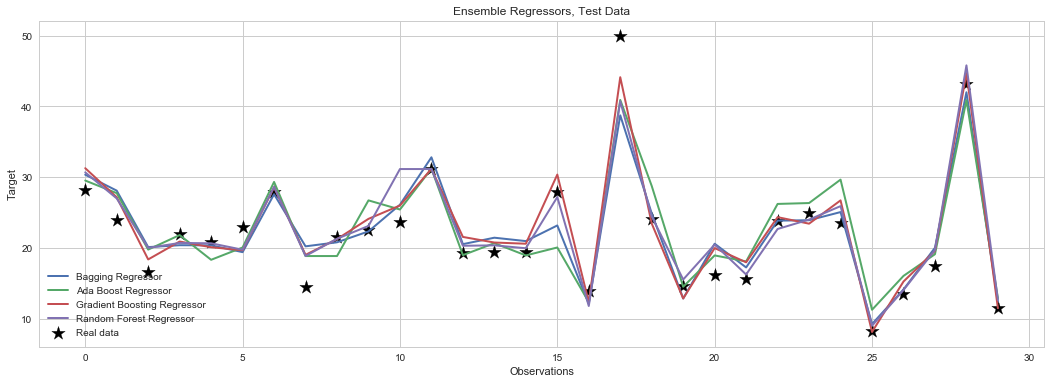

In [59]:
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test1[:n], marker='*', s=200, color='black', label='Real data')

plt.plot(x, y_br_test122[:n], lw=2, label='Bagging Regressor')
plt.plot(x, y_abr_test123[:n], lw=2, label='Ada Boost Regressor')
plt.plot(x, y_gbr_test124[:n], lw=2, label='Gradient Boosting Regressor')
plt.plot(x, y_rfr_test125[:n], lw=2, label='Random Forest Regressor')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Ensemble Regressors, Test Data')
plt.legend(loc=3);

 ### *Gaussian Processes; Toy Regression Dataset* 
 #### Kernels for Gaussian Processes
 - Kernel,
 - WhiteKernel,
 - ConstantKernel, 
 - RBF (Radial-basis function),
 - Matern (generalization of RBF),
 - RationalQuadratic,
 - ExpSineSquared, 
 -  DotProduct.

In [60]:
reg18 = GaussianProcessRegressor()

y_gpr_train418, y_gpr_test418 = regressor_fit_score(reg18, 'GaussianProcessRegressor', 'toy regression',
                                                    X_train4, X_test4, y_train4, y_test4)[:2]

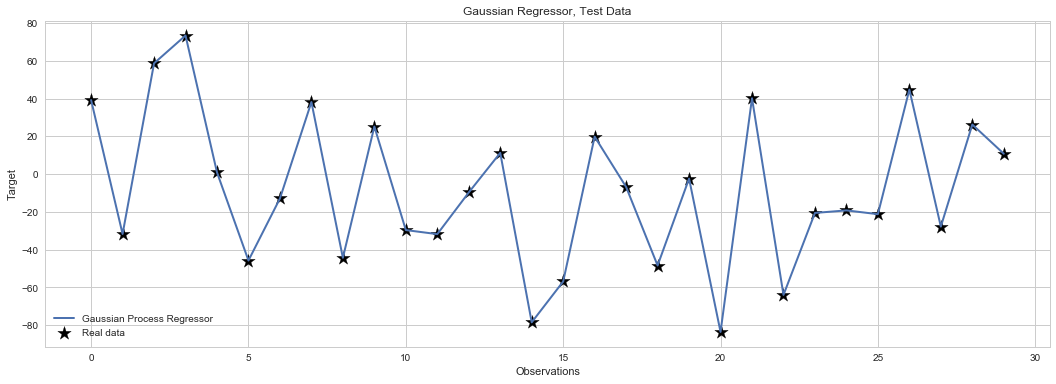

In [61]:
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test4[:n], marker='*', s=200, color='black', label='Real data')

plt.plot(x, y_gpr_test418[:n], lw=2, label='Gaussian Process Regressor')


plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Gaussian Regressor, Test Data')
plt.legend(loc=3);

In [62]:
df_results1, df_results1_2  = get_regressor_results()
df_results1_2.sort_values('r2_test', ascending=False)

,regressor_name,r2_train,r2_test,ev_train,ev_test,mse_train,mse_test,mae_train,mae_test,mdae_train,mdae_test
12,SGDRegressor,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0029,0.0028,0.0024,0.0023
10,PassiveAggressiveRegressor,1.0000,1.0000,1.0000,1.0000,0.0008,0.0008,0.0230,0.0219,0.0196,0.0179
23,GaussianProcessRegressor,1.0000,0.9999,1.0000,0.9999,0.0000,0.1394,0.0000,0.0189,0.0000,0.0000
14,KNeighborsRegressor,0.9950,0.9928,0.9950,0.9928,6.6334,9.1610,1.6972,1.9990,1.1764,1.4356
13,SVR,0.9646,0.9608,0.9646,0.9608,46.5634,49.6244,2.1838,2.1975,0.2676,0.2717
21,GradientBoostingRegressor,0.9780,0.9242,0.9780,0.9243,1.7750,7.4904,1.0375,2.1247,0.8262,1.7101
22,RandomForestRegressor,0.9763,0.9058,0.9763,0.9063,1.9166,9.3064,0.8930,2.3728,0.5950,1.8600
15,RadiusNeighborsRegressor,0.8952,0.8941,0.8952,0.8942,138.0280,133.8962,9.6249,9.4475,8.5893,8.1751
19,BaggingRegressor,0.9763,0.8937,0.9763,0.8937,1.9133,10.5053,0.9263,2.4550,0.6400,1.7300
11,ElasticNet,0.8824,0.8822,0.8824,0.8823,154.8799,148.9100,9.9324,9.7208,8.3987,7.8823


In [63]:
df_results1.sort_values('r2_test', ascending=False)

,dataset,ev_test,ev_train,mae_test,mae_train,mdae_test,mdae_train,mse_test,mse_train,r2_test,r2_train,regressor,regressor_name
12,toy regression,1.0000,1.0000,0.0028,0.0029,0.0023,0.0024,0.0000,0.0000,1.0000,1.0000,"SGDRegressor(alpha=0.0001, average=False, epsi...",SGDRegressor
10,toy regression,1.0000,1.0000,0.0219,0.0230,0.0179,0.0196,0.0008,0.0008,1.0000,1.0000,"PassiveAggressiveRegressor(C=1.0, epsilon=0.1,...",PassiveAggressiveRegressor
23,toy regression,0.9999,1.0000,0.0189,0.0000,0.0000,0.0000,0.1394,0.0000,0.9999,1.0000,"GaussianProcessRegressor(alpha=1e-10, copy_X_t...",GaussianProcessRegressor
14,toy regression,0.9928,0.9950,1.9990,1.6972,1.4356,1.1764,9.1610,6.6334,0.9928,0.9950,"KNeighborsRegressor(algorithm='auto', leaf_siz...",KNeighborsRegressor
13,toy regression,0.9608,0.9646,2.1975,2.1838,0.2717,0.2676,49.6244,46.5634,0.9608,0.9646,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",SVR
21,boston,0.9243,0.9780,2.1247,1.0375,1.7101,0.8262,7.4904,1.7750,0.9242,0.9780,"GradientBoostingRegressor(alpha=0.9, criterion...",GradientBoostingRegressor
22,boston,0.9063,0.9763,2.3728,0.8930,1.8600,0.5950,9.3064,1.9166,0.9058,0.9763,"RandomForestRegressor(bootstrap=True, criterio...",RandomForestRegressor
15,toy regression,0.8942,0.8952,9.4475,9.6249,8.1751,8.5893,133.8962,138.0280,0.8941,0.8952,"RadiusNeighborsRegressor(algorithm='auto', lea...",RadiusNeighborsRegressor
19,boston,0.8937,0.9763,2.4550,0.9263,1.7300,0.6400,10.5053,1.9133,0.8937,0.9763,"BaggingRegressor(base_estimator=None, bootstra...",BaggingRegressor
11,toy regression,0.8823,0.8824,9.7208,9.9324,7.8823,8.3987,148.9100,154.8799,0.8822,0.8824,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet


### *Combining Regression with Kernels; Toy Regression Dataset 2*

In [157]:
reg14 = KernelRidge()
reg14.fit(X_train7, y_train7)
    
y_kr_train714 = reg14.predict(X_train7)
y_kr_test714 = reg14.predict(X_test7)

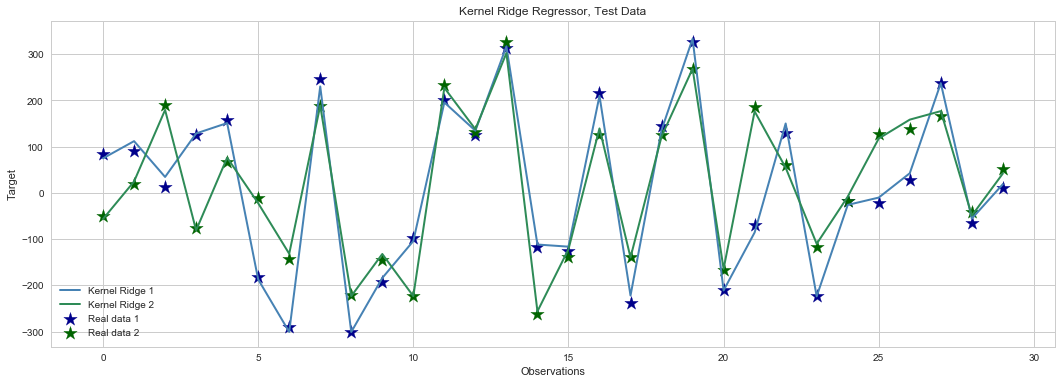

In [158]:
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test7[:n, 0], marker='*', s=200, color='darkblue', label='Real data 1')
plt.scatter(x, y_test7[:n, 1], marker='*', s=200, color='darkgreen', label='Real data 2')

plt.plot(x, y_kr_test714[:n, 0], lw=2, color='steelblue', label='Kernel Ridge 1')
plt.plot(x, y_kr_test714[:n, 1], lw=2, color='seagreen', label='Kernel Ridge 2')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Kernel Ridge Regressor, Test Data')
plt.legend(loc=3);

In [159]:
reg14.score(X_test7, y_test7)

0.9966

### *Isotonic Regression & Dummy Regressor*

In [67]:
reg26 = IsotonicRegression()
reg27 = dummy.DummyRegressor(strategy='quantile', quantile = 0.75)

y_ir_test126 = reg26.fit_transform(np.arange(102), y_test1)

reg27.fit(X_train1, y_train1)
y_dr_test127 = reg27.predict(X_test1)

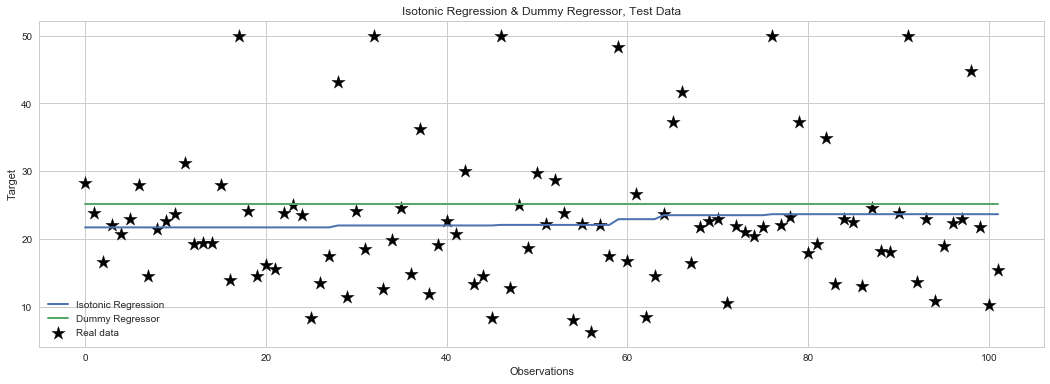

In [68]:
plt.figure(figsize=(18,6))
n=102
x=range(n)

plt.scatter(x, y_test1[:n], marker='*', s=200, color='black', label='Real data')

plt.plot(x, y_ir_test126[:n], lw=2, label='Isotonic Regression')
plt.plot(x, y_dr_test127[:n], lw=2, label='Dummy Regressor')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Isotonic Regression & Dummy Regressor, Test Data')
plt.legend(loc=3);

### 3.2. Classification

In [144]:
# Logistic Regression, SGD Classifier; Digit Dataset
clf1 = linear_model.LogisticRegression()
clf2 = linear_model.LogisticRegressionCV() 
clf3 = linear_model.SGDClassifier()

In [145]:
y_lrc_train31, y_lrc_test31 = classifier_fit_score(clf1, 'LogisticRegression', 'digits',
                                                   X_train3, X_test3, y_train3, y_test3)[:2]

y_lrcvc_train32, y_lrcvc_test32 = classifier_fit_score(clf2, 'LogisticRegressionCV', 'digits',
                                                       X_train3, X_test3, y_train3, y_test3)[:2]

y_sgdc_train33, y_sgdc_test33 = classifier_fit_score(clf3, 'SGDClassifier', 'digits',
                                                      X_train3, X_test3, y_train3, y_test3)[:2]

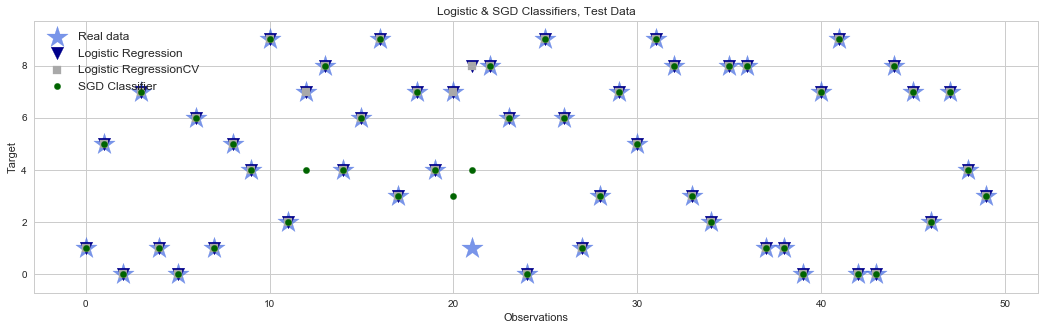

In [153]:
plt.figure(figsize=(18, 5))
n=50
x=range(n)

plt.scatter(x, y_test3[:n], marker='*', s=500, color='royalblue', alpha=0.7, label='Real data')

plt.scatter(x, y_lrc_test31[:n], marker='v', s=160, color='darkblue', label='Logistic Regression')
plt.scatter(x, y_lrcvc_test32[:n], marker='s', s=80, color='darkgrey', label='Logistic RegressionCV')
plt.scatter(x, y_sgdc_test33[:n], marker='o', s=40, color='darkgreen', label='SGD Classifier')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Logistic & SGD Classifiers, Test Data')
plt.legend(loc=2, fontsize=12);

In [154]:
# Ridge Classifiers; Digit Dataset
clf4 = linear_model.RidgeClassifier()
clf5 = linear_model.RidgeClassifierCV()

In [155]:
y_rc_train34, y_rc_test34 = classifier_fit_score(clf4, 'RidgeClassifier', 'digits',
                                                 X_train3, X_test3, y_train3, y_test3)[:2]

y_rcvc_train35, y_rcvc_test35 = classifier_fit_score(clf5, 'RidgeClassifierCV', 'digits',
                                                     X_train3, X_test3, y_train3, y_test3)[:2]

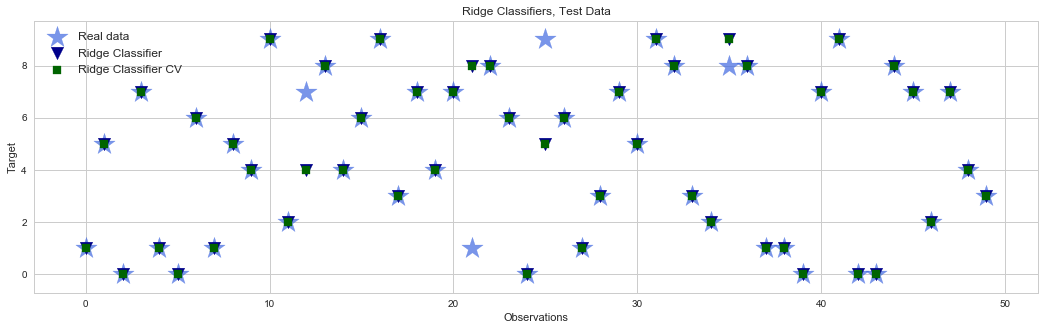

In [156]:
plt.figure(figsize=(18, 5))
n=50
x=range(n)

plt.scatter(x, y_test3[:n], marker='*', s=500, color='royalblue', alpha=0.7, label='Real data')

plt.scatter(x, y_rc_test34[:n], marker='v', s=160, color='darkblue', label='Ridge Classifier')
plt.scatter(x, y_rcvc_test35[:n], marker='s', s=80, color='darkgreen', label='Ridge Classifier CV')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Ridge Classifiers, Test Data')
plt.legend(loc=2, fontsize=12);

In [163]:
# Linear and Quadratic Discriminant Analysis; Digit Dataset
clf6 = LinearDiscriminantAnalysis()
clf7 = QuadraticDiscriminantAnalysis()

In [164]:
y_ldac_train36, y_ldac_test36 = classifier_fit_score(clf6, 'LinearDiscriminantAnalysis', 'digits',
                                                     X_train3, X_test3, y_train3, y_test3)[:2]

y_qdac_train37, y_qdac_test37 = classifier_fit_score(clf7, 'QuadraticDiscriminantAnalysis', 'digits',
                                                     X_train3, X_test3, y_train3, y_test3)[:2]

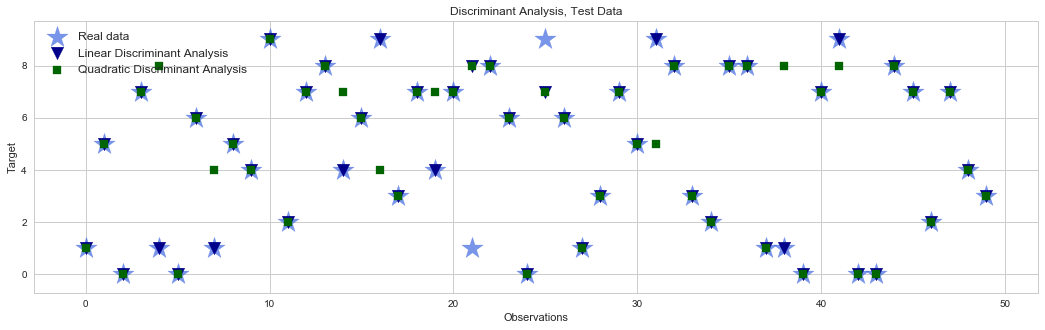

In [175]:
plt.figure(figsize=(18, 5))
n=50
x=range(n)

plt.scatter(x, y_test3[:n], marker='*', s=500, color='royalblue', alpha=0.7, label='Real data')

plt.scatter(x, y_ldac_test36[:n], marker='v', s=160, color='darkblue', label='Linear Discriminant Analysis')
plt.scatter(x, y_qdac_test37[:n], marker='s', s=80, color='darkgreen', label='Quadratic Discriminant Analysis')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Discriminant Analysis, Test Data')
plt.legend(loc=2, fontsize=12);

In [166]:
# Support Vector Machines; Digir Dataset
clf8 = svm.LinearSVC()
clf9 = svm.SVC(C=10.0, kernel='poly')
clf10 = svm.NuSVC(kernel='poly')

In [167]:
y_lsvc_train38, y_lsvc_test38 = classifier_fit_score(clf8, 'LinearSVC', 'digits',
                                                     X_train3, X_test3, y_train3, y_test3)[:2]

y_svc_train39, y_svc_test39 = classifier_fit_score(clf9, 'SVC', 'digits',
                                                     X_train3, X_test3, y_train3, y_test3)[:2]

y_nusvc_train310, y_nusvc_test310 = classifier_fit_score(clf10, 'NuSVC', 'digits',
                                                     X_train3, X_test3, y_train3, y_test3)[:2]

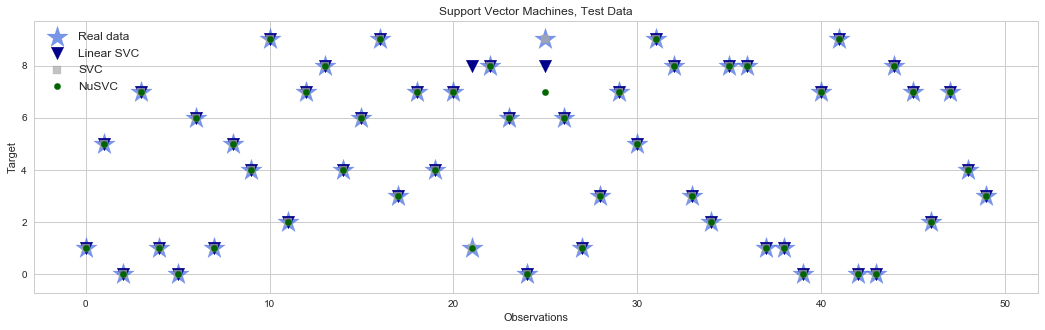

In [173]:
plt.figure(figsize=(18, 5))
n=50
x=range(n)

plt.scatter(x, y_test3[:n], marker='*', s=500, color='royalblue', alpha=0.7, label='Real data')

plt.scatter(x, y_lsvc_test38[:n], marker='v', s=160, color='darkblue', label='Linear SVC')
plt.scatter(x, y_svc_test39[:n], marker='s', s=80, color='darkgrey', alpha=0.7, label='SVC')
plt.scatter(x, y_nusvc_test310[:n], marker='o', s=40, color='darkgreen', label='NuSVC')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Support Vector Machines, Test Data')
plt.legend(loc=2, fontsize=12);

In [169]:
# Nearest Neighbors; Digit Dataset
clf11 = KNeighborsClassifier()
clf12 = RadiusNeighborsClassifier(radius=30)
clf13 = NearestCentroid()

In [170]:
y_knc_train311, y_knc_test311 = classifier_fit_score(clf11, 'KNeighborsClassifier', 'digits',
                                                   X_train3, X_test3, y_train3, y_test3)[:2]

y_rnc_train312, y_rnc_test312 = classifier_fit_score(clf12, 'RadiusNeighborsClassifier', 'digits',
                                                   X_train3, X_test3, y_train3, y_test3)[:2]

y_nc_train313, y_nc_test313 = classifier_fit_score(clf13, 'NearestCentroid', 'digits',
                                                   X_train3, X_test3, y_train3, y_test3)[:2]

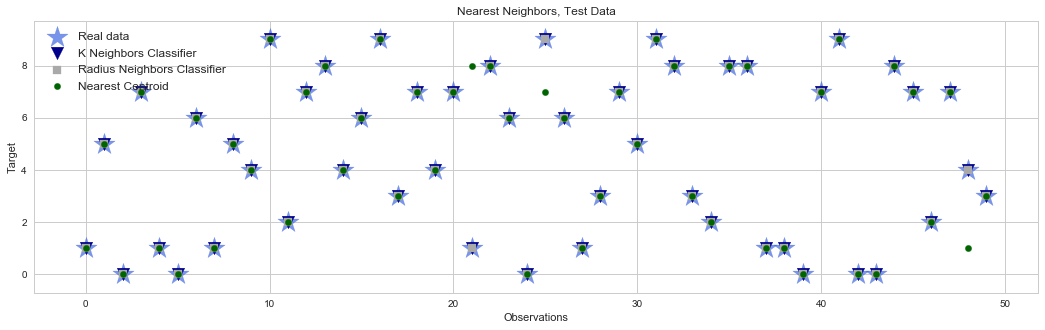

In [172]:
plt.figure(figsize=(18, 5))
n=50
x=range(n)

plt.scatter(x, y_test3[:n], marker='*', s=500, color='royalblue', alpha=0.7, label='Real data')

plt.scatter(x, y_knc_test311[:n], marker='v', s=160, color='darkblue', label='K Neighbors Classifier')
plt.scatter(x, y_rnc_test312[:n], marker='s', s=80, color='darkgrey', label='Radius Neighbors Classifier')
plt.scatter(x, y_nc_test313[:n], marker='o', s=40, color='darkgreen', label='Nearest Centroid')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Nearest Neighbors, Test Data')
plt.legend(loc=2, fontsize=12);

In [176]:
# Decision Tree, Extra Tree; Digit Dataset
clf14 = DecisionTreeClassifier()
clf15 = ExtraTreeClassifier()

In [177]:
y_dtc_train314, y_dtc_test314 = classifier_fit_score(clf14, 'DecisionTreeClassifier', 'digits',
                                                     X_train3, X_test3, y_train3, y_test3)[:2]

y_etc_train315, y_etc_test315 = classifier_fit_score(clf15, 'ExtraTreeClassifier', 'digits',
                                                       X_train3, X_test3, y_train3, y_test3)[:2]

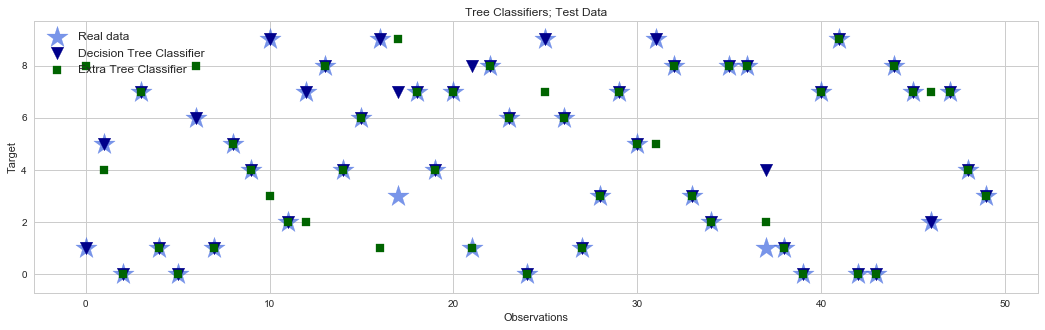

In [178]:
plt.figure(figsize=(18, 5))
n=50
x=range(n)

plt.scatter(x, y_test3[:n], marker='*', s=500, color='royalblue', alpha=0.7, label='Real data')

plt.scatter(x, y_dtc_test314[:n], marker='v', s=160, color='darkblue', label='Decision Tree Classifier')
plt.scatter(x, y_etc_test315[:n], marker='s', s=80, color='darkgreen', label='Extra Tree Classifier')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Tree Classifiers; Test Data')
plt.legend(loc=2, fontsize=12);

In [179]:
# Naive Bayes; Digit Dataset
clf16 = GaussianNB()
clf17 = BernoulliNB()
clf18 = MultinomialNB()

In [180]:
y_gnbc_train316, y_gnbc_test316 = classifier_fit_score(clf16, 'GaussianNB', 'digits',
                                                       X_train3, X_test3, y_train3, y_test3)[:2]

y_bnbc_train317, y_bnbc_test317 = classifier_fit_score(clf17, 'BernoulliNB', 'digits',
                                                       X_train3, X_test3, y_train3, y_test3)[:2]

y_mnbc_train318, y_mnbc_test318 = classifier_fit_score(clf18, 'MultinomialNB', 'digits',
                                                       X_train3, X_test3, y_train3, y_test3)[:2]

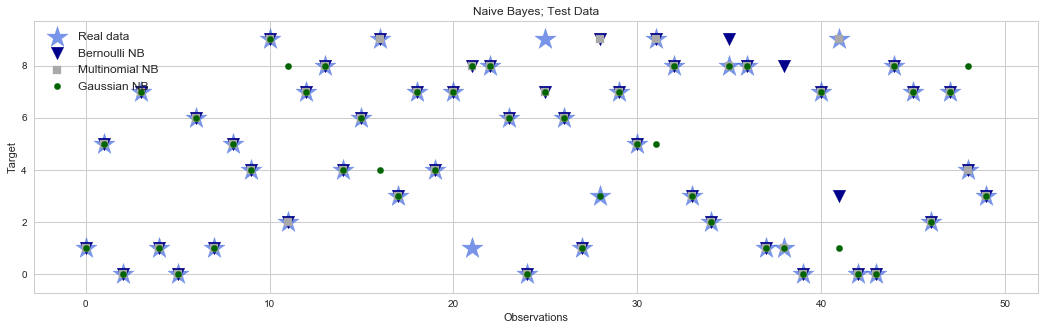

In [182]:
plt.figure(figsize=(18, 5))
n=50
x=range(n)

plt.scatter(x, y_test3[:n], marker='*', s=500, color='royalblue', alpha=0.7, label='Real data')

plt.scatter(x, y_bnbc_test317[:n], marker='v', s=160, color='darkblue', label='Bernoulli NB')
plt.scatter(x, y_mnbc_test318[:n], marker='s', s=80, color='darkgrey', label='Multinomial NB')
plt.scatter(x, y_gnbc_test316[:n], marker='o', s=40, color='darkgreen', label='Gaussian NB')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Naive Bayes; Test Data')
plt.legend(loc=2, fontsize=12);

In [183]:
# Ensemble Classifiers; Digit Dataset
clf19 = BaggingClassifier()
clf20 = RandomForestClassifier()

In [184]:
y_bc_train319, y_bc_test319 = classifier_fit_score(clf19, 'BaggingClassifier', 'digits',
                                                   X_train3, X_test3, y_train3, y_test3)[:2]

y_rfc_train320, y_rfc_test320 = classifier_fit_score(clf20, 'RandomForestClassifier', 'digits',
                                                     X_train3, X_test3, y_train3, y_test3)[:2]

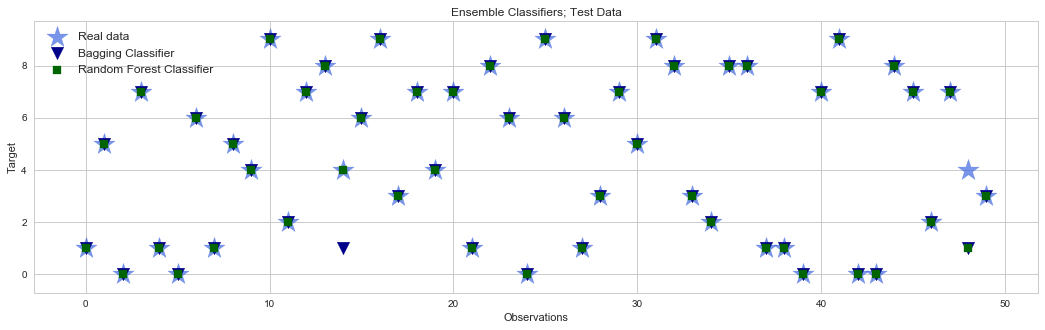

In [185]:
plt.figure(figsize=(18, 5))
n=50
x=range(n)

plt.scatter(x, y_test3[:n], marker='*', s=500, color='royalblue', alpha=0.7, label='Real data')

plt.scatter(x, y_bc_test319[:n], marker='v', s=160, color='darkblue', label='Bagging Classifier')
plt.scatter(x, y_rfc_test320[:n], marker='s', s=80, color='darkgreen', label='Random Forest Classifier')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Ensemble Classifiers; Test Data')
plt.legend(loc=2, fontsize=12);

In [186]:
# Ensemble Classifiers; Digit Dataset
clf21 = AdaBoostClassifier(n_estimators=64, learning_rate=0.01)
clf22 = GradientBoostingClassifier()

In [187]:
y_abc_train321, y_abc_test321 = classifier_fit_score(clf21, 'AdaBoostClassifier', 'digits',
                                                     X_train3, X_test3, y_train3, y_test3)[:2]

y_gbc_train322, y_gbc_test322 = classifier_fit_score(clf22, 'GradientBoostingClassifier', 'digits',
                                                     X_train3, X_test3, y_train3, y_test3)[:2]

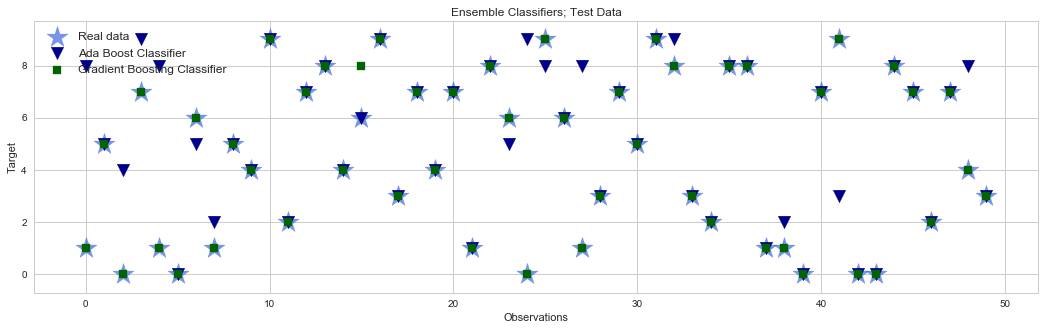

In [188]:
plt.figure(figsize=(18, 5))
n=50
x=range(n)

plt.scatter(x, y_test3[:n], marker='*', s=500, color='royalblue', alpha=0.7, label='Real data')

plt.scatter(x, y_abc_test321[:n], marker='v', s=160, color='darkblue', label='Ada Boost Classifier')
plt.scatter(x, y_gbc_test322[:n], marker='s', s=80, color='darkgreen', label='Gradient Boosting Classifier')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Ensemble Classifiers; Test Data')
plt.legend(loc=2, fontsize=12);

In [189]:
# Perceptron, Passive Aggressive Classifiers; Digit Dataset
clf23 = linear_model.Perceptron()
clf24 = linear_model.PassiveAggressiveClassifier()

In [190]:
y_pc_train323, y_pc_test323 = classifier_fit_score(clf23, 'Perceptron', 'digits',
                                                   X_train3, X_test3, y_train3, y_test3)[:2]

y_pac_train324, y_pac_test324 = classifier_fit_score(clf24, 'PassiveAggressiveClassifier', 'digits',
                                                     X_train3, X_test3, y_train3, y_test3)[:2]

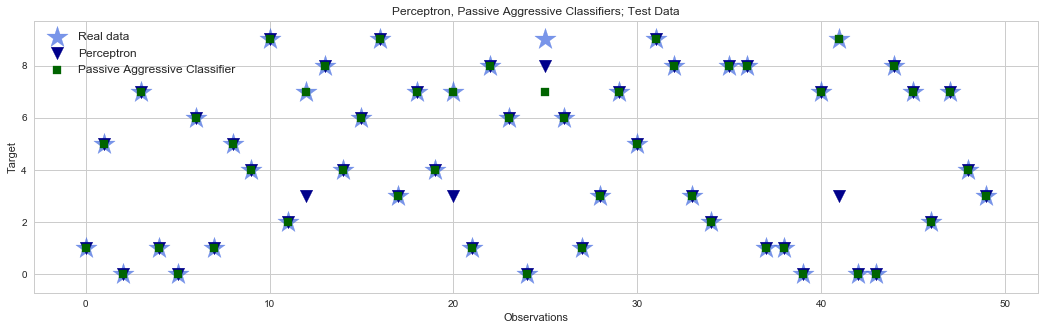

In [191]:
plt.figure(figsize=(18, 5))
n=50
x=range(n)

plt.scatter(x, y_test3[:n], marker='*', s=500, color='royalblue', alpha=0.7, label='Real data')

plt.scatter(x, y_pc_test323[:n], marker='v', s=160, color='darkblue', label='Perceptron')
plt.scatter(x, y_pac_test324[:n], marker='s', s=80, color='darkgreen', label='Passive Aggressive Classifier')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Perceptron, Passive Aggressive Classifiers; Test Data')
plt.legend(loc=2, fontsize=12);

In [192]:
# Gaussian Process Classifier; Toy Blobs
clf25 = GaussianProcessClassifier()

y_gpc_train525, y_gpc_test525 = classifier_fit_score(clf25, 'GaussianProcessClassifier', 'toy blobs',
                                                     X_train5, X_test5, y_train5, y_test5)[:2]

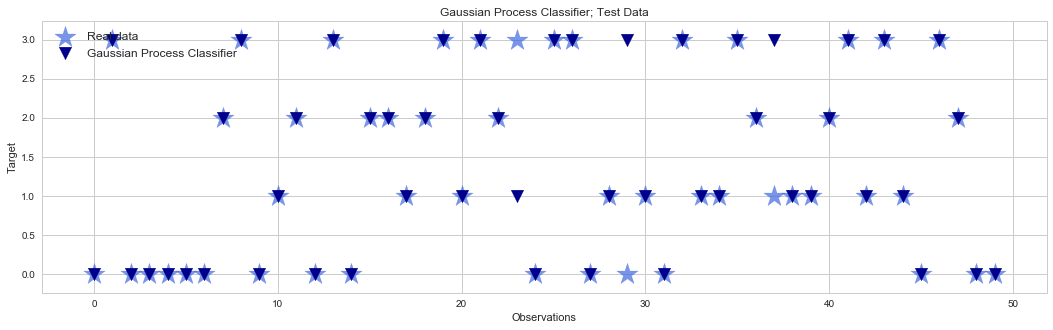

In [193]:
plt.figure(figsize=(18, 5))
n=50
x=range(n)

plt.scatter(x, y_test5[:n], marker='*', s=500, color='royalblue', alpha=0.7, label='Real data')

plt.scatter(x, y_gpc_test525[:n], marker='v', s=160, color='darkblue', label='Gaussian Process Classifier')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Gaussian Process Classifier; Test Data')
plt.legend(loc=2, fontsize=12);

In [194]:
# Semisupervised; Toy Blobs
clf26 = LabelPropagation()
clf27 = LabelSpreading()

In [195]:
y_lpc_train526, y_lpc_test526 = classifier_fit_score(clf26, 'LabelPropagation', 'toy blobs',
                                                     X_train5, X_test5, y_train5, y_test5)[:2]

y_lsc_train527, y_lsc_test527 = classifier_fit_score(clf27, 'LabelSpreading', 'toy blobs',
                                                     X_train5, X_test5, y_train5, y_test5)[:2]

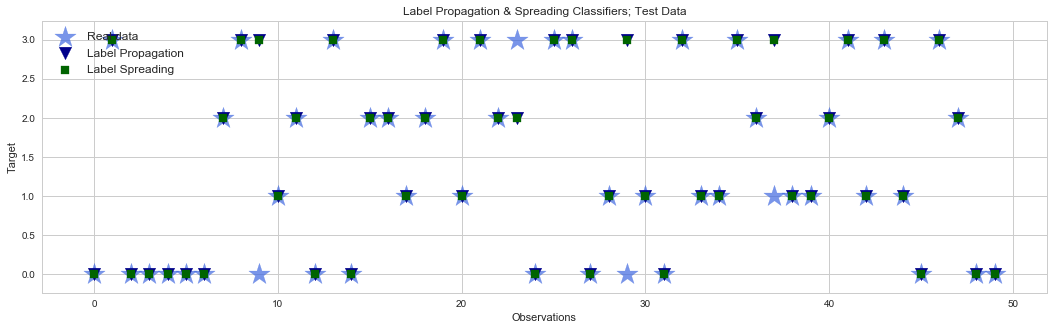

In [196]:
plt.figure(figsize=(18, 5))
n=50
x=range(n)

plt.scatter(x, y_test5[:n], marker='*', s=500, color='royalblue', alpha=0.7, label='Real data')

plt.scatter(x, y_lpc_test526[:n], marker='v', s=160, color='darkblue', label='Label Propagation')
plt.scatter(x, y_lsc_test527[:n], marker='s', s=80, color='darkgreen', label='Label Spreading')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Label Propagation & Spreading Classifiers; Test Data')
plt.legend(loc=2, fontsize=12);

In [104]:
df_results2, df_results2_2  = get_classifier_results()
df_results2_2.sort_values('acc_test', ascending=False)

,classifier_name,acc_train,acc_test,loss_train,loss_test
10,KNeighborsClassifier,0.9882,0.9944,0.0118,0.0056
11,RadiusNeighborsClassifier,0.9763,0.9944,0.0237,0.0056
8,SVC,1.0000,0.9861,0.0000,0.0139
1,LogisticRegressionCV,0.9903,0.9778,0.0097,0.0222
0,LogisticRegression,0.9965,0.9694,0.0035,0.0306
7,LinearSVC,0.9944,0.9667,0.0056,0.0333
23,PassiveAggressiveClassifier,0.9576,0.9639,0.0424,0.0361
9,NuSVC,0.9631,0.9639,0.0369,0.0361
5,LinearDiscriminantAnalysis,0.9659,0.9611,0.0341,0.0389
18,BaggingClassifier,0.9993,0.9611,0.0007,0.0389


In [105]:
df_results2

,acc_test,acc_train,classifier,classifier_name,clf_dataset,loss_test,loss_train
0,0.9694,0.9965,"LogisticRegression(C=1.0, class_weight=None, d...",LogisticRegression,digits,0.0306,0.0035
1,0.9778,0.9903,"LogisticRegressionCV(Cs=10, class_weight=None,...",LogisticRegressionCV,digits,0.0222,0.0097
2,0.9556,0.9576,"SGDClassifier(alpha=0.0001, average=False, cla...",SGDClassifier,digits,0.0444,0.0424
3,0.9472,0.9478,"RidgeClassifier(alpha=1.0, class_weight=None, ...",RidgeClassifier,digits,0.0528,0.0522
4,0.9500,0.9478,"RidgeClassifierCV(alphas=(0.1, 1.0, 10.0), cla...",RidgeClassifierCV,digits,0.0500,0.0522
5,0.9611,0.9659,"LinearDiscriminantAnalysis(n_components=None, ...",LinearDiscriminantAnalysis,digits,0.0389,0.0341
6,0.8167,0.8824,"QuadraticDiscriminantAnalysis(priors=None, reg...",QuadraticDiscriminantAnalysis,digits,0.1833,0.1176
7,0.9667,0.9944,"LinearSVC(C=1.0, class_weight=None, dual=True,...",LinearSVC,digits,0.0333,0.0056
8,0.9861,1.0000,"SVC(C=10.0, cache_size=200, class_weight=None,...",SVC,digits,0.0139,0.0000
9,0.9639,0.9631,"NuSVC(cache_size=200, class_weight=None, coef0...",NuSVC,digits,0.0361,0.0369


---
# 4. Unsupervised learning

In [106]:
# Gaussian mixture models
usl1 = mixture.GaussianMixture(n_components=4, n_init=4)
usl2 = mixture.BayesianGaussianMixture(n_components=4, n_init=4)

In [107]:
usl1.fit(X_train5, y_train5)
y_gmc_test51 = usl1.predict(X_test5)
usl2.fit(X_train5, y_train5)
y_bgmc_test52 = usl2.predict(X_test5)

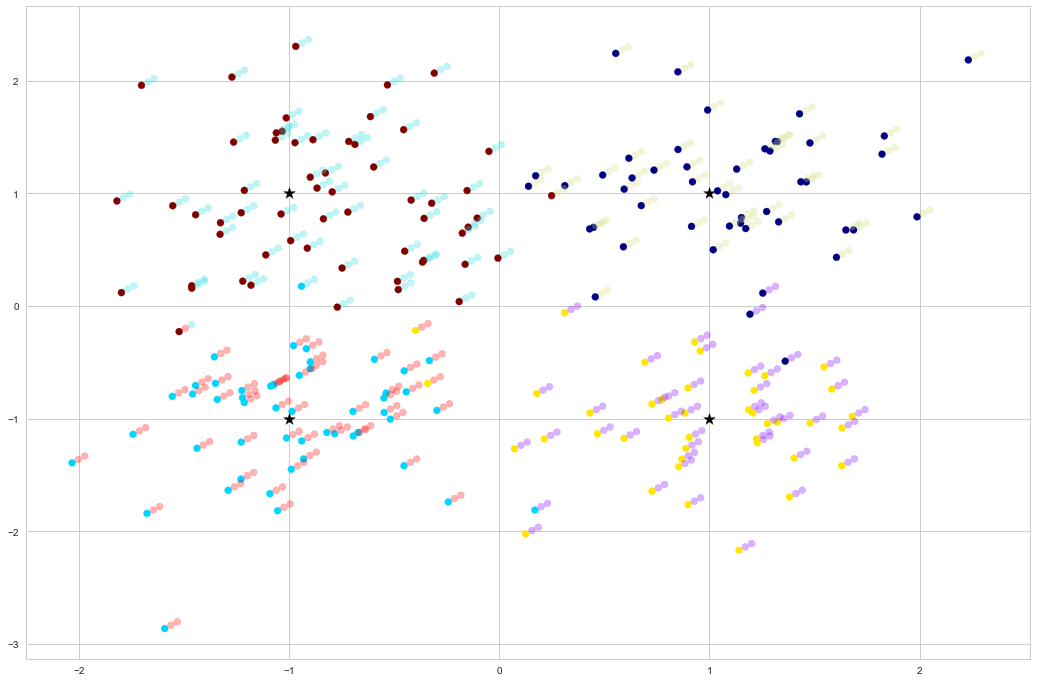

In [108]:
plt.figure(figsize=(18,12))
plt.scatter(X_test5[:, 0], X_test5[:, 1], c=y_test5, cmap=cm.jet)

plt.scatter(X_test5[:, 0]+0.03, X_test5[:, 1]+0.03, c=y_gmc_test51, alpha=0.3, cmap=cm.rainbow)
plt.scatter(X_test5[:, 0]+0.06, X_test5[:, 1]+0.06, c=y_bgmc_test52, alpha=0.3, cmap=cm.rainbow)

plt.scatter([1,-1,1,-1], [1,-1,-1,1], c='black', marker='*', s=150);

In [109]:
# Manifold learning
usl3 = manifold.Isomap()
usl4 = manifold.LocallyLinearEmbedding()

In [110]:
usl3.fit(X_train5, y_train5)

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=1,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)

In [111]:
usl4.fit(X_train5, y_train5)

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
            method='standard', modified_tol=1e-12, n_components=2,
            n_jobs=1, n_neighbors=5, neighbors_algorithm='auto',
            random_state=None, reg=0.001, tol=1e-06)

In [120]:
usl5 = manifold.SpectralEmbedding()
usl6 = manifold.MDS()

In [121]:
usl7 = manifold.TSNE()

In [ ]:
# Clustering


In [ ]:
# Biclustering


---
# 5. Neural network models

## 5.1 Supervised

In [363]:
# Multi-layer Perceptron; Classifier
nn_clf1 = MLPClassifier(hidden_layer_sizes=(512,), max_iter=70, solver='sgd',
                        verbose=0, random_state=1, learning_rate_init=.01)
nn_clf1.fit(X_train3, y_train3);

In [364]:
nn_clf1.score(X_train3, y_train3)

1

In [365]:
nn_clf1.score(X_test3, y_test3)

0.9889

In [242]:
# Multi-layer Perceptron; Regressor
nn_reg1 = MLPRegressor(hidden_layer_sizes=(104,), max_iter=1000, solver='lbfgs', alpha=0.015)

nn_reg1.fit(X_train1, y_train1);

In [243]:
nn_reg1.score(X_train1, y_train1)

0.8713

In [244]:
nn_reg1.score(X_test1, y_test1)

0.8982

In [245]:
y_mlpr_test11 = nn_reg1.predict(X_test1)

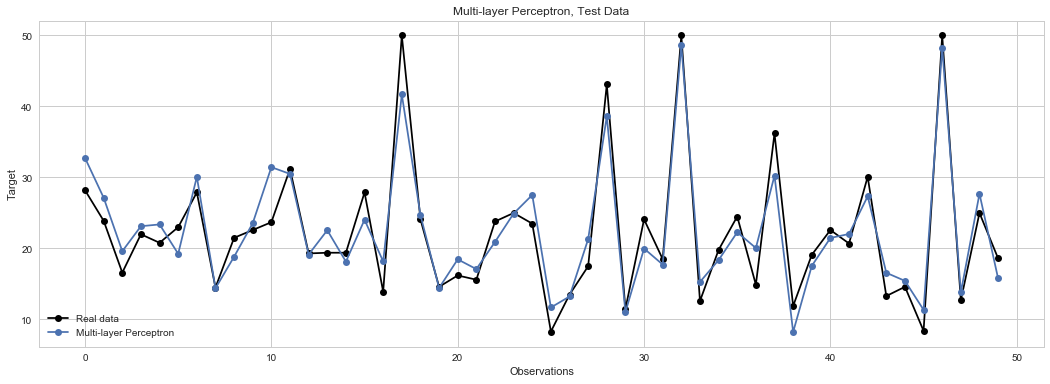

In [268]:
plt.figure(figsize=(18,6))
n=50
x=range(n)

plt.plot(x, y_test1[:n], '-o', color='black', label='Real data')

plt.plot(x, y_mlpr_test11[:n], '-o', label='Multi-layer Perceptron')


plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Multi-layer Perceptron, Test Data')
plt.legend(loc=3);

## 5.2 Unsupervised

In [366]:
# Restricted Boltzmann machines
X_train3_scaled = (X_train3 - np.min(X_train3, 0)) / (np.max(X_train3, 0) + 0.0001)
X_test3_scaled = (X_test3 - np.min(X_test3, 0)) / (np.max(X_test3, 0) + 0.0001)

logistic = linear_model.LogisticRegression()
logistic.C = 3000.0

brbm = BernoulliRBM(random_state=0, verbose=False)
brbm.learning_rate, brbm.n_iter, brbm.n_components = 0.05, 30, 64

nn_clf2 = Pipeline(steps=[('brbm', brbm), ('logistic', logistic)])

In [367]:
nn_clf2.fit(X_train3_scaled, y_train3)

Pipeline(steps=[('brbm', BernoulliRBM(batch_size=10, learning_rate=0.05, n_components=64, n_iter=30,
       random_state=0, verbose=False)), ('logistic', LogisticRegression(C=3000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [368]:
print("Logistic regression using BRBM features:\n%s\n" % \
      (classification_report(y_test3, nn_clf2.predict(X_test3_scaled))))

Logistic regression using BRBM features:
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        43
          1       1.00      1.00      1.00        35
          2       0.97      1.00      0.99        36
          3       0.93      0.95      0.94        41
          4       0.97      1.00      0.99        38
          5       0.93      0.90      0.92        30
          6       1.00      1.00      1.00        37
          7       1.00      0.92      0.96        37
          8       0.93      0.90      0.91        29
          9       0.89      0.97      0.93        34

avg / total       0.96      0.96      0.96       360


